In [1]:
import h5py
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
import tables
import matplotlib.pyplot as plt
import tensorflow as tf
import preprocessing

In [2]:
model = keras.models.load_model('models/highLevel_preprocessed_no_weights_processing')

2022-09-25 12:25:20.046955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:25:20.132046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:25:20.132482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:25:20.134286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [22]:
dataPath = '/home/WindowsDrive/Shared/Top_Tagging_Data/test.h5'
with h5py.File(dataPath, 'r') as data:

    npDataLabels = np.array(data['labels'])

    npDataWeights = np.array(data['weights'])

    jetVars = {key: data[key][...] for key in data.attrs.get('jet')}
    
    hlDataArr = {key: data[key][...] for key in data.attrs.get('hl')}

processed_dict = preprocessing.high_level(hlDataArr)
processed_df = pd.DataFrame(processed_dict)

jetVarsArr = [val for val in jetVars.values()]
jetVarsDf = pd.DataFrame(np.stack(jetVarsArr, axis=-1))

data_train, data_test, labels_train, labels_test, weights_train, weights_test, jetVars_train, jetVars_test = train_test_split(processed_df, npDataLabels, npDataWeights, jetVarsDf, test_size=0.33, random_state=69, shuffle=True)

## Now to start analysing

In [23]:
testPreds = model.predict(data_test)

25618/25618 [==============================] - 45s 2ms/step


In [25]:
print(jetVars.keys())

dict_keys(['fjet_pt', 'fjet_eta', 'fjet_phi', 'fjet_m'])


In [26]:
data_test_new = data_test.copy()
data_test_new['labels'] = labels_test
data_test_new['weights'] = weights_test
data_test_new['predictions'] = testPreds
data_test_new['jet_pt'] = jetVars_test[0]
data_test_new['jet_eta'] = jetVars_test[1]
data_test_new['jet_phi'] = jetVars_test[2]
data_test_new['jet_m'] = jetVars_test[3]

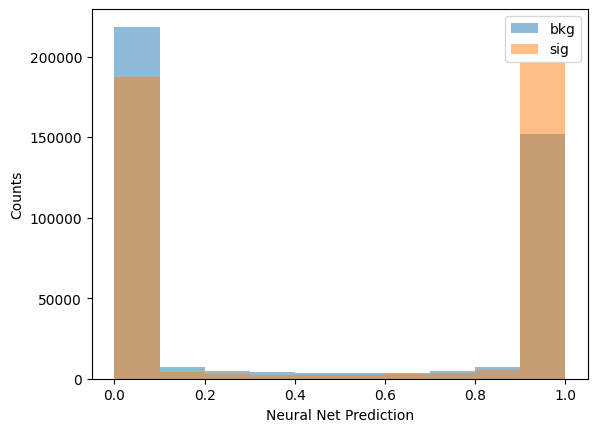

In [27]:
sigIndices = data_test_new['labels'] == 1
bkgIndices = data_test_new['labels'] == 0

plt.figure()
plt.xlabel('Neural Net Prediction')
plt.ylabel('Counts')

bkgHist = plt.hist(data_test_new['predictions'][bkgIndices], bins=10, weights=data_test_new['weights'][bkgIndices], label='bkg', alpha=0.5)
sigHist = plt.hist(data_test_new['predictions'][sigIndices], bins=10, weights=data_test_new['weights'][sigIndices], label='sig', alpha=0.5)

# bkgHistNN = plt.hist(backgroundVals["predictions"], bins=5, weights=backgroundVals["weights"],label="backgrounds", range=[0,1], alpha=0.6)
# sigHistNN = plt.hist(signalVals["predictions"], bins=5, weights=signalVals["weights"],  label=r"$H\rightarrow \tau\tau$ signal",range=[0,1], alpha=0.6)

# bkgHistNN = plt.hist(backgroundVals['predictions'], bins=5, label="backgrounds", range=[0,1], alpha=0.6)
# sigHistNN = plt.hist(signalVals['predictions'], bins=5, label="signals", range=[0,1], alpha=0.6)

plt.legend()
# plt.yscale('log')
plt.show() 

In [13]:
print(data_test_new.columns)

Index(['fjet_Tau1_wta', 'fjet_Tau2_wta', 'fjet_Tau3_wta', 'fjet_Tau4_wta',
       'fjet_Split12', 'fjet_Split23', 'fjet_ECF1', 'fjet_ECF2', 'fjet_ECF3',
       'fjet_C2', 'fjet_D2', 'fjet_Qw', 'fjet_L2', 'fjet_L3', 'fjet_ThrustMaj',
       'labels', 'weights', 'predictions'],
      dtype='object')
